In [3]:
import pandas as pd
import sqlite3 as sq
conn = sq.connect('factbook.db')
q = "select * from sqlite_master where 'type=table';"
pd.read_sql_query(q, conn)
q_facts = "select * from facts limit 5"
pd.read_sql_query(q_facts, conn)

id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  
0               2.32       38.57       13.89            1.51  
1               0.30       12.92        6.58            3.30  
2               1.84       23.67        4.31            0.92  
3               0.12        8.13        6.96            0.00  
4               2.78       38.78       11.49            0.46

In [5]:
q_facts = "select min(population), max(population), min(population_growth), max(population_growth) from facts;"
pd.read_sql_query(q_facts, conn)

min(population)  max(population)  min(population_growth)  \
0                0       7256490011                     0.0   

   max(population_growth)  
0                    4.02

In [6]:
q = "select name, population from facts where population in (0,7256490011);"
pd.read_sql_query(q, conn)

name  population
0  Antarctica           0
1       World  7256490011

Antarctica and World are not countries - probably World is just a summary row.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefdd119470>,
      dtype=object)

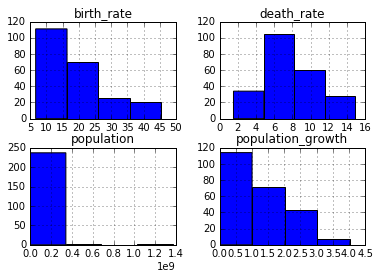

In [9]:
%matplotlib inline
q = "select population, population_growth, birth_rate, death_rate from facts where name not in ('Antarctica', 'World');"
d = pd.read_sql_query(q, conn)
d.hist(bins = 4)